In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from scipy.stats import skew
from sklearn.linear_model import LinearRegression, Ridge, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import log_loss, accuracy_score
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
#from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
#import graphviz
#import xgboost as xgb
from sklearn.preprocessing import (
MinMaxScaler,
StandardScaler,
)
import tensorflow as tf


In [3]:
df_august = pd.read_csv('https://raw.githubusercontent.com/WitoldSurdej/PFML/master/apartments_pl_2023_08.csv')
df_september = pd.read_csv('https://raw.githubusercontent.com/WitoldSurdej/PFML/master/apartments_pl_2023_09.csv')
df_october = pd.read_csv('https://raw.githubusercontent.com/WitoldSurdej/PFML/master/apartments_pl_2023_10.csv')

In [4]:
df_august['Month'] = 0
df_september['Month'] = 1
df_october['Month'] = 2

In [5]:
frames = [df_august, df_september, df_october]
df = pd.concat(frames)

In [6]:
# Shape of dataframe
df.shape

(52592, 29)

In [7]:
# Dropping id and columns which have a very high number of missing values, being impossible to apply techniques such as imputation
df.drop(['id','type', 'floor', 'buildYear', 'floorCount', 'condition', 'buildingMaterial','Month'], axis=1, inplace=True)


In [8]:
num_cols = df.select_dtypes([np.number]).columns

In [9]:
df_nums = df[num_cols].reset_index(drop=True)
df_nums.shape

(52592, 14)

In [10]:
# Dropping rows which contain missing values
df_clean = df_nums.dropna()

In [11]:
# Dropping duplicates if any
df_clean = df_clean.drop_duplicates().reset_index(drop=True)

In [12]:
df_clean.shape

(32038, 14)

In [13]:
cat_cols = df_clean.select_dtypes(['object']).columns
df_cats = df_clean[cat_cols].reset_index(drop=True)

In [14]:
df_clean.head()

,squareMeters,rooms,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
0,36.00,2.0,53.442692,14.559690,2.15,16.0,0.273,0.492,0.652,0.291,0.348,1.404,0.205,395995
1,73.02,3.0,53.452222,14.553333,3.24,9.0,0.275,0.672,0.367,0.246,0.300,1.857,0.280,565000
2,87.60,3.0,53.435100,14.532900,2.27,32.0,0.175,0.259,0.223,0.359,0.101,0.310,0.087,640000
3,66.00,3.0,53.410278,14.503611,4.07,1.0,0.218,1.690,0.504,0.704,0.501,2.138,0.514,759000
4,63.30,3.0,53.463100,14.572800,4.48,10.0,0.079,1.224,0.737,0.260,1.102,0.377,0.745,499000


In [15]:
df_clean.describe()

,squareMeters,rooms,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
count,32038.000000,32038.000000,32038.000000,32038.000000,32038.000000,32038.000000,32038.000000,32038.000000,32038.000000,32038.000000,32038.000000,32038.000000,32038.000000,3.203800e+04
mean,57.149583,2.625258,51.985320,19.562597,4.330976,20.078969,0.387949,0.951657,0.489389,0.339536,0.329925,1.473548,0.335175,6.942392e+05
std,20.387076,0.888286,1.309210,1.755493,2.768399,22.763925,0.383238,0.849242,0.415407,0.352139,0.377508,1.108303,0.369143,3.407004e+05
min,25.000000,1.000000,49.981357,14.462282,0.020000,0.000000,0.004000,0.001000,0.001000,0.002000,0.001000,0.006000,0.001000,1.500000e+05
25%,43.000000,2.000000,51.108744,18.546066,2.090000,7.000000,0.175000,0.362000,0.236000,0.154000,0.117000,0.599000,0.144000,4.600000e+05
50%,53.310000,3.000000,52.190000,19.924150,3.980000,14.000000,0.286000,0.679000,0.386000,0.258000,0.233000,1.150000,0.237000,6.290000e+05
75%,66.400000,3.000000,52.389519,20.996740,6.020000,24.000000,0.453000,1.226750,0.611000,0.405000,0.410000,2.107000,0.396000,8.300000e+05
max,150.000000,6.000000,54.571600,23.207128,16.940000,208.000000,4.472000,4.996000,4.585000,4.680000,4.269000,5.000000,4.242000,2.500000e+06


In [16]:
print(df_clean.columns)

Index(['squareMeters', 'rooms', 'latitude', 'longitude', 'centreDistance',
       'poiCount', 'schoolDistance', 'clinicDistance', 'postOfficeDistance',
       'kindergartenDistance', 'restaurantDistance', 'collegeDistance',
       'pharmacyDistance', 'price'],
      dtype='object')


DATA SPLIT

In [17]:

#X1 = df_clean.loc[:,df_clean.columns != 'price']
#X1 = df_clean.loc[:,df_clean.columns == ['squareMeters','longitude','poiCount']]
selected_columns=['squareMeters', 'longitude', 'poiCount']
X1 = df_clean[selected_columns]
y1 = df_clean['price'].values

In [18]:
minmax_scaler = MinMaxScaler().set_output(transform="pandas")
X1_normalized = minmax_scaler.fit_transform(X1)

In [19]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_normalized, y1, test_size = 0.3, random_state = 42)

In [20]:
print(X1_normalized.shape)
print(y1.shape)
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(32038, 3)
(32038,)
(22426, 3)
(22426,)
(9612, 3)
(9612,)


In [21]:
X1_train1, X1_validation, y1_train1, y1_validation = train_test_split(X1_train, y1_train, test_size = 0.3, random_state = 41)
print(X1_train.shape)
print(y1_train.shape)
print(X1_train1.shape)
print(y1_train1.shape)
print(X1_validation.shape)
print(y1_validation.shape)
#X1_train1.to_csv('data.csv', index=False)
#y1_train1.to_csv('data.csv', index=False) 
#X1_validation.to_csv('data.csv', index=False) 
#y1_validation.to_csv('data.csv', index=False) 
#X1_test.to_csv('data.csv', index=False) 
#y1_test.to_csv('data.csv', index=False) 


(22426, 3)
(22426,)
(15698, 3)
(15698,)
(6728, 3)
(6728,)


In [28]:
def train_NN(X1_train1,y1_train1,X1_validation,y1_validation,model,num_iterations):

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


    #accuracy_train=np.zeros([1,num_iterations])
    #accuracy_validation=np.zeros([1,num_iterations])
    #accuracy_test=np.zeros([1,num_iterations])

    #accuracy=np.zeros([3,num_iterations])

    for iteration in range(num_iterations):

        # Define a callback to collect training history
        history_callback = tf.keras.callbacks.History()

        early_stopping_callback = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',  # Monitor validation loss
        patience=5,  # Stop training if no improvement for 5 consecutive epochs
        restore_best_weights=True  # Restore model weights to the best observed during training
        )

        history = model.fit(X1_train1, y1_train1, epochs=500, validation_data=(X1_validation, y1_validation), callbacks=[early_stopping_callback])

    return history, model

In [25]:
# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)),  # Input layer with 2 features
#    tf.keras.layers.Dense(3, activation='sigmoid'),  # Hidden layer with 4 neurons and ReLU activation
#    tf.keras.layers.Dense(3, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='relu')  # Output layer with sigmoid activation for binary classification
])


num_iterations=1


history, model = train_NN(X1_train1,y1_train1,X1_validation,y1_validation,model,num_iterations)


  #history = model.fit(X1_train1, y1_train1, epochs=50, batch_size=32, callbacks=[history_callback])




  


Epoch 1/50
491/491 [==============================] - 2s 3ms/step - loss: 2573036.7500 - accuracy: 0.0000e+00 - val_loss: 532939.3125 - val_accuracy: 0.0000e+00
Epoch 2/50
491/491 [==============================] - 1s 2ms/step - loss: -721531.7500 - accuracy: 0.0000e+00 - val_loss: -4943470.0000 - val_accuracy: 0.0000e+00
Epoch 3/50
491/491 [==============================] - 1s 3ms/step - loss: -8024369.5000 - accuracy: 0.0000e+00 - val_loss: -8895570.0000 - val_accuracy: 0.0000e+00
Epoch 4/50
491/491 [==============================] - 2s 3ms/step - loss: -9175206.0000 - accuracy: 0.0000e+00 - val_loss: -9484550.0000 - val_accuracy: 0.0000e+00
Epoch 5/50
491/491 [==============================] - 2s 3ms/step - loss: -10057196.0000 - accuracy: 0.0000e+00 - val_loss: -10190503.0000 - val_accuracy: 0.0000e+00
Epoch 6/50
491/491 [==============================] - 1s 2ms/step - loss: -10335462.0000 - accuracy: 0.0000e+00 - val_loss: -10345077.0000 - val_accuracy: 0.0000e+00
Epoch 7/50
491/4

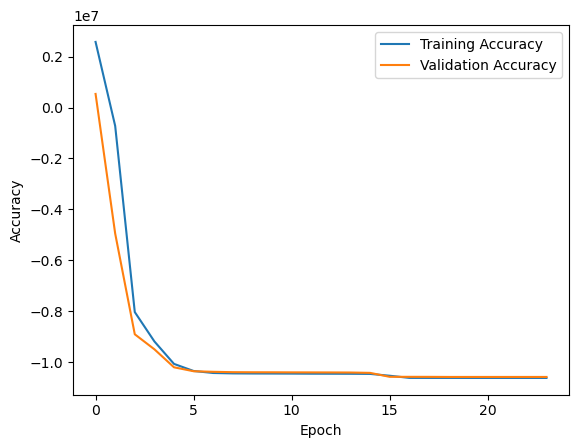

In [26]:
# Extract accuracy values from the training history
training_accuracy_per_epoch = history.history['loss']
validation_accuracy_per_epoch = history.history['val_loss']

  #loss_train, accuracy= model.evaluate(X1_train1, y1_train1)
  #loss_train, accuracy= model.evaluate(X1_train, y1_train)

  
  # Plot the accuracy values
plt.plot(training_accuracy_per_epoch, label='Training Accuracy')
plt.plot(validation_accuracy_per_epoch, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)),  # Input layer with 2 features
#    tf.keras.layers.Dense(3, activation='sigmoid'),  # Hidden layer with 4 neurons and ReLU activation
#    tf.keras.layers.Dense(3, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])


num_iterations=1


history, model = train_NN(X1_train1,y1_train1,X1_validation,y1_validation,model,num_iterations)

Epoch 1/500
491/491 [==============================] - 1s 1ms/step - loss: -268196.1562 - accuracy: 0.0000e+00 - val_loss: -608060.6250 - val_accuracy: 0.0000e+00
Epoch 2/500
491/491 [==============================] - 1s 1ms/step - loss: -951330.7500 - accuracy: 0.0000e+00 - val_loss: -1288022.6250 - val_accuracy: 0.0000e+00
Epoch 3/500
491/491 [==============================] - 1s 1ms/step - loss: -1634571.8750 - accuracy: 0.0000e+00 - val_loss: -1968705.1250 - val_accuracy: 0.0000e+00
Epoch 4/500
491/491 [==============================] - 0s 964us/step - loss: -2318349.0000 - accuracy: 0.0000e+00 - val_loss: -2649644.2500 - val_accuracy: 0.0000e+00
Epoch 5/500
491/491 [==============================] - 1s 1ms/step - loss: -3001941.5000 - accuracy: 0.0000e+00 - val_loss: -3330327.2500 - val_accuracy: 0.0000e+00
Epoch 6/500
491/491 [==============================] - 0s 1ms/step - loss: -3685123.7500 - accuracy: 0.0000e+00 - val_loss: -4011025.0000 - val_accuracy: 0.0000e+00
Epoch 7/500

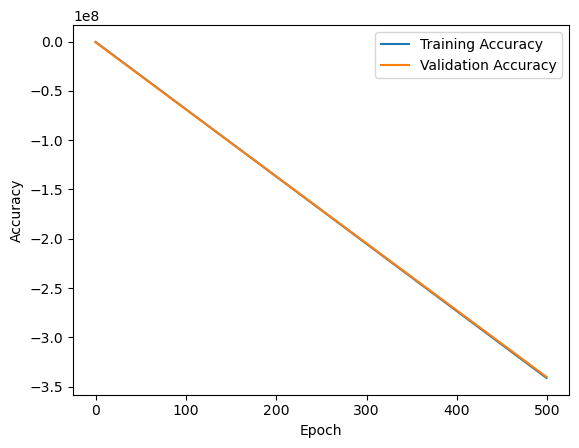

In [30]:
# Extract accuracy values from the training history
training_accuracy_per_epoch = history.history['loss']
validation_accuracy_per_epoch = history.history['val_loss']

  #loss_train, accuracy= model.evaluate(X1_train1, y1_train1)
  #loss_train, accuracy= model.evaluate(X1_train, y1_train)

  
  # Plot the accuracy values
plt.plot(training_accuracy_per_epoch, label='Training Accuracy')
plt.plot(validation_accuracy_per_epoch, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()